In [15]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
df=pd.read_csv("tips.CSV")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips_df=pd.get_dummies(df)
tips_df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


### We will drop extra variable columns using drop_first method
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'

In [5]:

pd.get_dummies(df,drop_first=True)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0,0
240,27.18,2.00,2,0,1,1,0,0,0
241,22.67,2.00,2,1,1,1,0,0,0
242,17.82,1.75,2,1,0,1,0,0,0


## One Hot Encoding with scikit learn

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe= OneHotEncoder(sparse=False)
ohe_arr=ohe.fit_transform(df[['sex','smoker','day','time']])
ohe_arr

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [12]:
tips_df.keys()

Index(['total_bill', 'tip', 'size', 'sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'],
      dtype='object')

In [28]:
ohe_en_df=pd.DataFrame(ohe_arr,columns=['sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'])
ohe_en_df

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

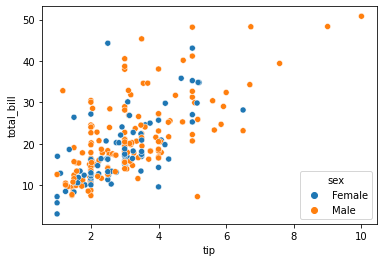

In [19]:
sns.scatterplot(x='tip',y='total_bill',data=df,hue='sex')

<AxesSubplot:xlabel='day', ylabel='tip'>

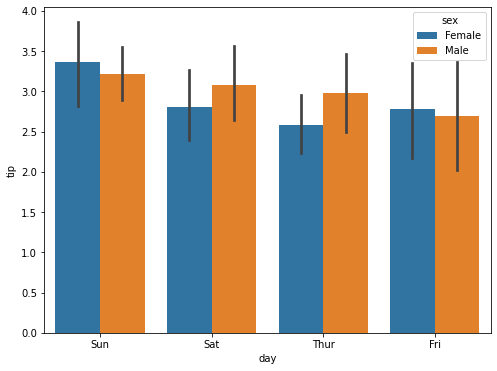

In [27]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
sns.barplot(x='day',y='tip',data=df,hue='sex')

In [41]:
## tips are high usually on sunday and female pay high tips

<AxesSubplot:xlabel='sex', ylabel='tip'>

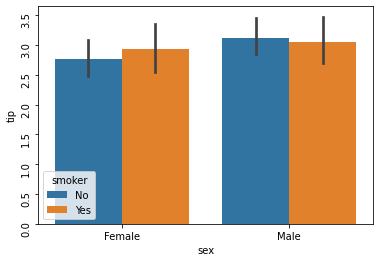

In [35]:
plt.yticks(rotation=90)
sns.barplot(x='sex',y='tip',data=df,hue='smoker')

#### we observe from above bar plot male pay more tip then female and non smoker male pay more tip 
#### on the other hand female pay low tip as compare to male and smoker female pay more tip

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

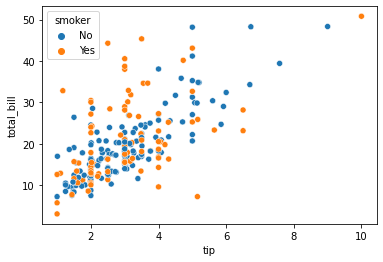

In [39]:
sns.scatterplot(x='tip',y='total_bill',data=df,hue='smoker')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

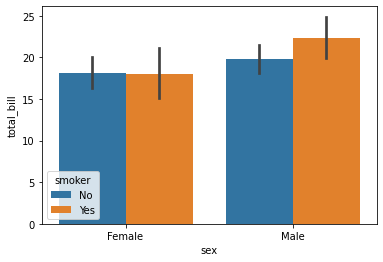

In [40]:
sns.barplot(x='sex',y='total_bill',data=df,hue='smoker')

#### we observe that total_bill of males are high as compare to female and in males total bill of smoker male are high 
#### on the other hand total bill of both smoker and non smoker female bill are same

<AxesSubplot:xlabel='day', ylabel='total_bill'>

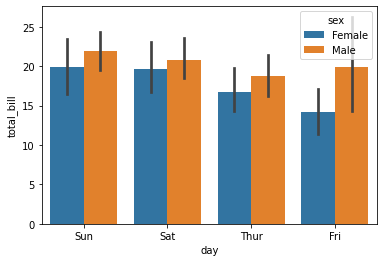

In [42]:
sns.barplot(x='day',y='total_bill',data=df,hue='sex')

### the bar plot show total bill of male are high mostly 
## and on sundays and saturdays total bills are are high as compare to other days 